### In this project we will use a retail store sales transactions dataset from kaggle. 
The dataset can be find here https://www.kaggle.com/marian447/retail-store-sales-transactions
### We will:
##### 1 import and clean the dataset
##### 2 Assign Cohort
##### 3 Calculate Retention Rate
##### 4 Segment the data by quantity and Revenu


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set_style()

In [2]:
#import the dataset

raw_data = pd.read_csv('scanner_data.csv')
raw_data.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


#### Clean the data

In [4]:
#check for missing values
raw_data.isnull().sum()

Unnamed: 0        0
Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

There is no any missing values.

In [5]:
#Check for duplicated values
raw_data.duplicated().sum()

0

There is no any duplicate values.

In [6]:
#check the type of the different columns in the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [7]:
#Let's converte the Date columns to datetime and drop the Unnamed: 0 column
raw_data = raw_data.drop('Unnamed: 0', axis=1)
raw_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [8]:
raw_data.Date = pd.to_datetime(raw_data.Date, format='%d/%m/%Y')
raw_data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [9]:
#let's check for duplicated again
raw_data.duplicated().sum()

0

### Assign Cohort

In [10]:
#Now let's group the data base on date and customer ID. 
#Sum the quantity and sales amount
#get the max values for other columns

grouping = pd.DataFrame(raw_data.groupby(['Date','Customer_ID']).agg({'Quantity':'sum', 'Sales_Amount':'sum', 'Transaction_ID':'max',
                                             'SKU_Category':'max', 'SKU':'max'})).reset_index()

grouping

,Date,Customer_ID,Quantity,Sales_Amount,Transaction_ID,SKU_Category,SKU
0,2016-01-02,3,4.0,10.92,90,TW8,Y1M2E
1,2016-01-02,178,2.0,58.99,84,R6E,HO1M5
2,2016-01-02,195,2.0,13.10,107,LGI,VY2UB
3,2016-01-02,343,1.0,6.75,134,XG4,ZSVWE
4,2016-01-02,399,2.0,10.43,136,P42,XJLWY
...,...,...,...,...,...,...,...
62722,2016-12-31,22481,2.0,12.93,64646,R6E,88188
62723,2016-12-31,22593,1.0,6.24,64618,H15,BK9BM
62724,2016-12-31,22595,1.0,11.69,64608,C8Z,2517R
62725,2016-12-31,22596,1.0,23.98,64614,B93,3FPTW


In [11]:
#Now let assign a cohort index to row. But before that let's get the transaction month (transac_month) and the month where a customer was aquired (aquir_month).
#The cohort index is the different between transac_month and aquir_month
#aquir_month is the min value of all transactions date made by a customer

grouping['transac_month']  = grouping.Date.apply(lambda x: dt.date(x.year, x.month, 1))
#grouping[grouping['Customer_ID'] == 3]

In [12]:
#let's get aquir_month
# first let's group the datset base on customer id and transaction month(transac_month)."That mean for each customer we will have all his/her transaction date"
#Then we transform the result group and pick the min date

grouping['aquir_month'] = grouping.groupby(['Customer_ID'])['transac_month'].transform('min')
grouping


,Date,Customer_ID,Quantity,Sales_Amount,Transaction_ID,SKU_Category,SKU,transac_month,aquir_month
0,2016-01-02,3,4.0,10.92,90,TW8,Y1M2E,2016-01-01,2016-01-01
1,2016-01-02,178,2.0,58.99,84,R6E,HO1M5,2016-01-01,2016-01-01
2,2016-01-02,195,2.0,13.10,107,LGI,VY2UB,2016-01-01,2016-01-01
3,2016-01-02,343,1.0,6.75,134,XG4,ZSVWE,2016-01-01,2016-01-01
4,2016-01-02,399,2.0,10.43,136,P42,XJLWY,2016-01-01,2016-01-01
...,...,...,...,...,...,...,...,...,...
62722,2016-12-31,22481,2.0,12.93,64646,R6E,88188,2016-12-01,2016-11-01
62723,2016-12-31,22593,1.0,6.24,64618,H15,BK9BM,2016-12-01,2016-12-01
62724,2016-12-31,22595,1.0,11.69,64608,C8Z,2517R,2016-12-01,2016-12-01
62725,2016-12-31,22596,1.0,23.98,64614,B93,3FPTW,2016-12-01,2016-12-01


In [13]:
#Now we can get the cohort index

#funtion to get the difference between the two date
def date_diff(x):
    d1=x.transac_month
    d2= x.aquir_month
    
    return ((d1.year - d2.year)*12 + (d1.month - d2.month)) + 1

grouping['cohort_index'] = grouping.apply(lambda x: date_diff(x), axis=1)

In [14]:
grouping.cohort_index.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
grouping

,Date,Customer_ID,Quantity,Sales_Amount,Transaction_ID,SKU_Category,SKU,transac_month,aquir_month,cohort_index
0,2016-01-02,3,4.0,10.92,90,TW8,Y1M2E,2016-01-01,2016-01-01,1
1,2016-01-02,178,2.0,58.99,84,R6E,HO1M5,2016-01-01,2016-01-01,1
2,2016-01-02,195,2.0,13.10,107,LGI,VY2UB,2016-01-01,2016-01-01,1
3,2016-01-02,343,1.0,6.75,134,XG4,ZSVWE,2016-01-01,2016-01-01,1
4,2016-01-02,399,2.0,10.43,136,P42,XJLWY,2016-01-01,2016-01-01,1
...,...,...,...,...,...,...,...,...,...,...
62722,2016-12-31,22481,2.0,12.93,64646,R6E,88188,2016-12-01,2016-11-01,2
62723,2016-12-31,22593,1.0,6.24,64618,H15,BK9BM,2016-12-01,2016-12-01,1
62724,2016-12-31,22595,1.0,11.69,64608,C8Z,2517R,2016-12-01,2016-12-01,1
62725,2016-12-31,22596,1.0,23.98,64614,B93,3FPTW,2016-12-01,2016-12-01,1


In [16]:
#raw_data.info()

#uniq = pd.Series.unique
#uniq = pd.to_numeric(uniq)
#cd = pd.DataFrame(raw_data.groupby(['cohort_index', 'aquir_month'])['Customer_ID'].apply(uniq).reset_index())

#cd
#cd.Customer_ID = pd.to_numeric(cd.Customer_ID)

#table = cd.pivot_table(index='aquir_month', columns='cohort_index', values= 'Customer_ID')
#table

### Calculate Retention Rate


In [42]:
#let's create a function that shows the absolut value by cohort by month

def get_cohort_matrix(data, var='Customer_ID', unique_fun=pd.Series.nunique):
    
    #group the data
    cd = data.groupby(['aquir_month','cohort_index'])[var].apply(unique_fun).reset_index()
    
    #pivot the data with aquir_month as index, cohort_index as columns and values as the number of unique customer
    table = cd.pivot_table(index='aquir_month', columns='cohort_index', values= var)
    
    #retation rate
    total_month = table.iloc[:,0]

    retention = table.divide(total_month, axis=0)
    retention = retention.round(3) * 100
    retention = retention.round(3)
    
    return table, retention

cohort_table, retention_rate = get_cohort_matrix(grouping)


In [18]:
#grouping = raw_data.groupby(['aquir_month','cohort_index'])

#cohort_data = grouping['Customer_ID'].apply(pd.Series.nunique)
#cohort_data

##reset the index
#cohort_data = cohort_data.reset_index()
#cohort_data

##create a pivot table
#cohort_matrix = cohort_data.pivot(index='aquir_month', columns='cohort_index', values= 'Customer_ID')
#cohort_matrix


In [19]:
#Number of customer by cohort
cohort_table


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
aquir_month,,,,,,,,,,,,
2016-01-01,3396.0,1306.0,1025.0,597.0,266.0,197.0,152.0,137.0,90.0,56.0,41.0,40.0
2016-02-01,2221.0,478.0,291.0,147.0,95.0,68.0,68.0,57.0,22.0,18.0,14.0,NaN
2016-03-01,2642.0,746.0,651.0,600.0,530.0,521.0,530.0,512.0,513.0,532.0,NaN,NaN
2016-04-01,2527.0,728.0,633.0,553.0,566.0,595.0,566.0,567.0,581.0,NaN,NaN,NaN
2016-05-01,2626.0,626.0,559.0,505.0,566.0,551.0,521.0,523.0,NaN,NaN,NaN,NaN
2016-06-01,1569.0,278.0,274.0,280.0,278.0,277.0,300.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,1213.0,172.0,183.0,189.0,182.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,1060.0,163.0,138.0,143.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,1625.0,309.0,263.0,297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#retention analysis
retention_rate

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
aquir_month,,,,,,,,,,,,
2016-01-01,100.0,38.5,30.2,17.6,7.8,5.8,4.5,4.0,2.7,1.6,1.2,1.2
2016-02-01,100.0,21.5,13.1,6.6,4.3,3.1,3.1,2.6,1.0,0.8,0.6,NaN
2016-03-01,100.0,28.2,24.6,22.7,20.1,19.7,20.1,19.4,19.4,20.1,NaN,NaN
2016-04-01,100.0,28.8,25.0,21.9,22.4,23.5,22.4,22.4,23.0,NaN,NaN,NaN
2016-05-01,100.0,23.8,21.3,19.2,21.6,21.0,19.8,19.9,NaN,NaN,NaN,NaN
2016-06-01,100.0,17.7,17.5,17.8,17.7,17.7,19.1,NaN,NaN,NaN,NaN,NaN
2016-07-01,100.0,14.2,15.1,15.6,15.0,16.6,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,100.0,15.4,13.0,13.5,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,100.0,19.0,16.2,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Base on the retention rate we can see that the customers who sign on march are the one who make the most purchases over time.

### Segment the data by quantity and Revenu

In [ ]:
#groupby_quantity = raw_data.groupby(['cohort_index','aquir_month'])
#cohort_quantity = groupby_quantity['Quantity'].apply(pd.Series.mean)

##reset the index
#cohort_quantity = cohort_quantity.reset_index()
#cohort_quantity

#quantity_matrix = cohort_quantity.pivot(index='aquir_month', columns='cohort_index', values='Quantity')
#quantity_matrix

#### Segment by quatity

In [90]:
#Let's using the previews function to get the cohort segmentation my quantity
cohort_quantity, quantity_rate = get_cohort_matrix(grouping,var='Quantity',unique_fun=pd.Series.mean)
cohort_quantity = cohort_quantity.round(2)
cohort_quantity

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
aquir_month,,,,,,,,,,,,
2016-01-01,3.16,3.35,3.13,3.04,3.51,3.64,3.64,2.86,3.85,2.99,6.00,2.49
2016-02-01,2.99,2.72,3.06,2.82,3.09,3.82,2.36,2.48,6.64,1.65,1.82,NaN
2016-03-01,2.92,3.35,3.75,3.63,3.92,3.64,3.75,3.79,3.42,3.42,NaN,NaN
2016-04-01,2.81,3.31,3.53,2.86,3.27,3.27,3.59,3.13,3.46,NaN,NaN,NaN
2016-05-01,2.71,3.16,3.24,3.09,3.11,3.21,3.63,3.35,NaN,NaN,NaN,NaN
2016-06-01,2.71,3.07,3.41,2.58,3.17,2.73,3.47,NaN,NaN,NaN,NaN,NaN
2016-07-01,2.73,2.47,2.67,3.53,2.74,3.26,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,2.61,2.76,2.70,3.59,2.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,2.92,3.19,3.69,3.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here we can the average purchases made by each cohort over time.

#### Segment by revenu

In [74]:
cohort_revenu , retention_revenu = get_cohort_matrix(grouping, var='Sales_Amount', unique_fun=pd.Series.median)

In [75]:
cohort_revenu

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
aquir_month,,,,,,,,,,,,
2016-01-01,11.460,13.290,12.67,12.470,14.685,15.730,13.70,12.05,12.110,11.165,11.78,13.75
2016-02-01,12.075,12.360,12.08,11.190,14.265,14.705,11.05,9.91,12.160,9.860,11.94,NaN
2016-03-01,12.000,13.650,13.02,13.785,14.325,13.140,14.41,16.25,13.845,14.870,NaN,NaN
2016-04-01,11.860,12.620,13.44,12.630,13.210,13.430,13.44,13.80,14.290,NaN,NaN,NaN
2016-05-01,11.590,13.535,12.61,13.100,12.190,12.160,13.41,13.12,NaN,NaN,NaN,NaN
2016-06-01,12.330,12.690,11.93,11.500,11.705,12.645,13.50,NaN,NaN,NaN,NaN,NaN
2016-07-01,12.030,11.570,12.08,12.715,13.750,13.590,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,11.880,10.020,11.38,12.205,11.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,11.930,10.740,12.43,13.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualization of the different retation rate with a heatmap.

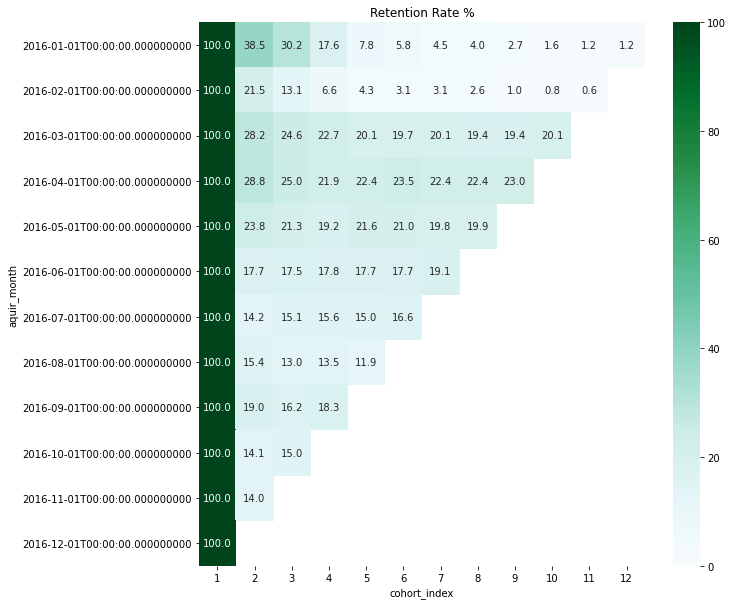

In [76]:
#create a seaborn heatmap 

# retention rate heatmap
plt.figure(figsize=(10,10))
plt.title('Retention Rate %')

sns.heatmap(data = retention_rate, annot=True, vmin=0.0, vmax=100, cmap='BuGn', fmt='')

plt.show()

In [91]:
cohort_revenu = cohort_revenu.round(2)

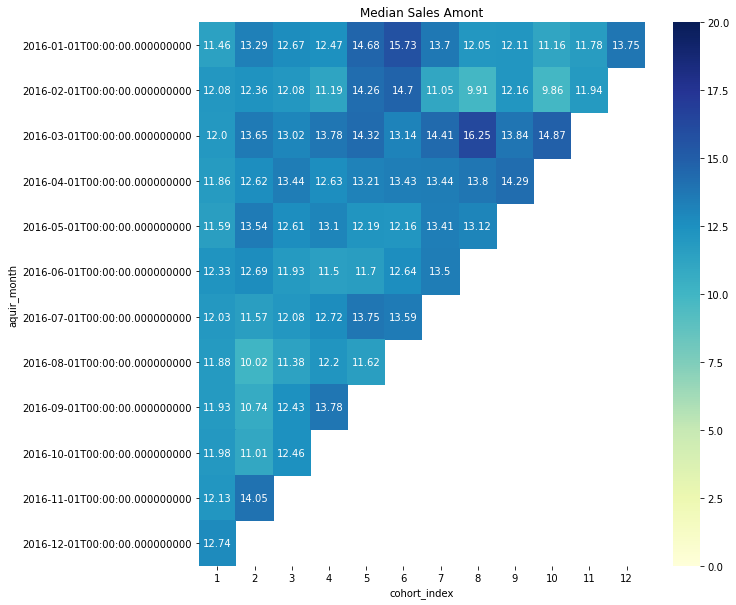

In [99]:
# retention revenu heatmap
plt.figure(figsize=(10,10))
plt.title('Median Sales Amont')
sns.heatmap(data = cohort_revenu, annot=True, vmin=0.0, vmax=20, cmap='YlGnBu', fmt='')

plt.show()

In [100]:
cohort_quantity

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
aquir_month,,,,,,,,,,,,
2016-01-01,3.16,3.35,3.13,3.04,3.51,3.64,3.64,2.86,3.85,2.99,6.00,2.49
2016-02-01,2.99,2.72,3.06,2.82,3.09,3.82,2.36,2.48,6.64,1.65,1.82,NaN
2016-03-01,2.92,3.35,3.75,3.63,3.92,3.64,3.75,3.79,3.42,3.42,NaN,NaN
2016-04-01,2.81,3.31,3.53,2.86,3.27,3.27,3.59,3.13,3.46,NaN,NaN,NaN
2016-05-01,2.71,3.16,3.24,3.09,3.11,3.21,3.63,3.35,NaN,NaN,NaN,NaN
2016-06-01,2.71,3.07,3.41,2.58,3.17,2.73,3.47,NaN,NaN,NaN,NaN,NaN
2016-07-01,2.73,2.47,2.67,3.53,2.74,3.26,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,2.61,2.76,2.70,3.59,2.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,2.92,3.19,3.69,3.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


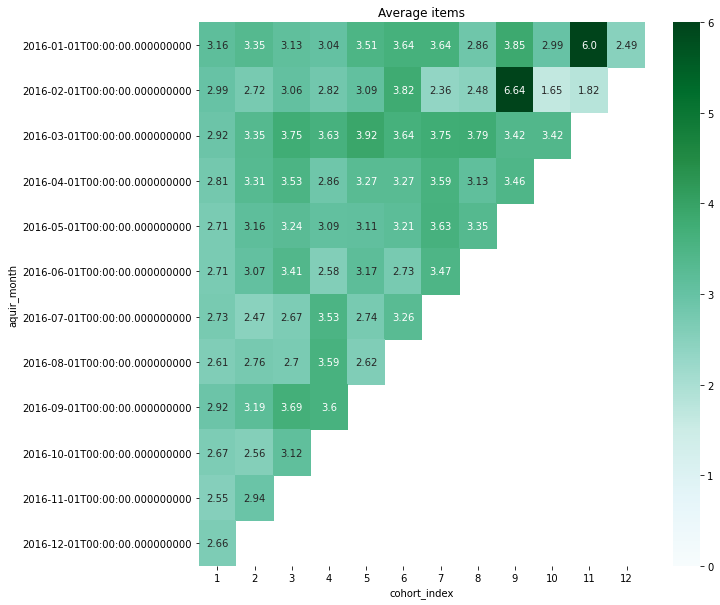

In [109]:
plt.figure(figsize=(10,10))
plt.title('Average items')
sns.heatmap(data = cohort_quantity, annot=True, vmin=0.0, vmax=6, fmt='', cmap='BuGn')

plt.show()